In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [41]:
data = np.load("Intel_Stock_History_from_1980_03_17.npy")

In [50]:
round(np.mean(list(map(lambda x: int(len(str(math.floor(x)))), data))), 3)

2.3

In [32]:
# 주가 데이터 첫째자리 분포
first_digit = [int(x[0]) for x in map(str, data)]
first_digit_count = np.bincount(first_digit)[1:]
first_digit_ratio = first_digit_count / np.sum(first_digit_count)

# 주가 데이터 둘째자리 분포
second_digit = [int(x[1]) for x in map(str, data * 10)]
second_digit_count = np.bincount(second_digit)
second_digit_ratio = second_digit_count / np.sum(second_digit_count)

In [33]:
# 벤포드 첫째자리 분포
x = np.arange(1, 10)
x2 = np.arange(0, 10)
benfordslaw_first_digit = np.log10(1 + 1/x)

# 벤포드 둘째자리 분포
benfordslaw_second_digit = np.zeros(10)
for d in x2:
    prob_sum = 0
    benfordslaw_second_digit[d] = np.sum(np.log10(1 + 1 / (10 * x + d)))
    
benfordslaw_first_digit

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

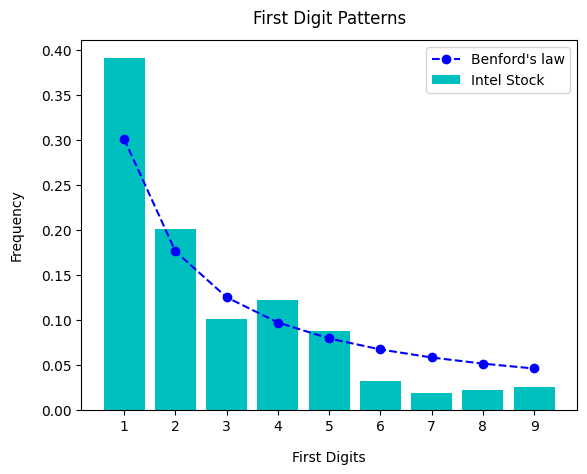

In [77]:
plt.bar(x, first_digit_ratio, color="c", label="Intel Stock")
plt.plot(x, benfordslaw_first_digit, "b--", marker="o", label="Benford's law")

plt.title("First Digit Patterns", pad=12)
plt.xlabel("First Digits", labelpad=12)
plt.ylabel("Frequency", labelpad=12)
plt.xticks(x)
plt.legend()

plt.show()

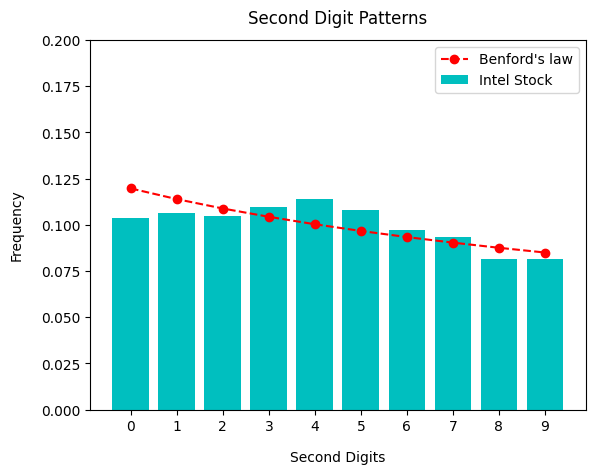

In [15]:
plt.bar(x2, second_digit_ratio, color="c", label="Intel Stock")
plt.plot(x2, benfordslaw_second_digit, "r--", marker="o", label="Benford's law")

plt.title("Second Digit Patterns", pad=12)
plt.xlabel("Second Digits", labelpad=12)
plt.ylabel("Frequency", labelpad=12)
plt.ylim(0, 0.20)
plt.xticks(x2)
plt.legend()

plt.show()

In [66]:
abs_diff_first_digit = np.abs(first_digit_ratio - benfordslaw_first_digit)
MAD_first_digit = np.sum(abs_diff_first_digit) / 9

In [65]:
abs_diff_second_digit = np.abs(second_digit_ratio - benfordslaw_second_digit)
MAD_second_digit = np.sum(abs_diff_second_digit) / 10
abs_diff_second_digit

array([0.01606504, 0.00772798, 0.00379177, 0.00522975, 0.01359196,
       0.01146658, 0.00401132, 0.00278758, 0.00613191, 0.00337048])

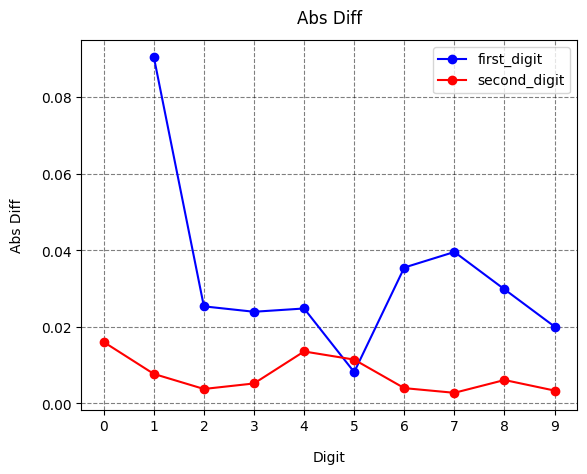

In [75]:
plt.plot(x, abs_diff_first_digit, "b",  marker="o", label="first_digit")
plt.plot(x2, abs_diff_second_digit, "r", marker="o", label="second_digit")

plt.title("Abs Diff", pad=12)
plt.xlabel("Digit", labelpad=12)
plt.ylabel("Abs Diff", labelpad=12)
plt.xticks(x2)
plt.grid(True, color='black', alpha=0.5, linestyle='--')
plt.legend()

plt.show()

In [80]:
round(MAD_first_digit, 5)

0.03311